Data loaded
######## Tail: 
                                                      text  label
1697528  wow $269.99 for the entire series on Blu Ray??...    1.0
1697529  Finally, the holy grail of tv-on-dvd boxsets i...    5.0
1697530  Could this be a true or I'm i dreaming batman ...    5.0
1697531  I've been a fan of the series since I was a yo...    5.0
1697532  People seriously need to wake up and realize t...    5.0
######## Total: 
Amount of reviews:  1693051
######## Empty: 
Empty DataFrame
Columns: [text, label]
Index: []
Empty DataFrame
Columns: [text, label]
Index: []
Before deleting duplicate entries:  1693051
After deleting duplicate entries:  1693051
Before deleting duplicate review texts:  1693051
After deleting duplicate review texts:  1693051
Before deleting empty review texts:  1693051
After deleting empty review texts:  1693051
######## Word Count: 
The shortest review text in our sample has 1 words.
Review text with the shortest length of 1 word appearing 80 times.
45

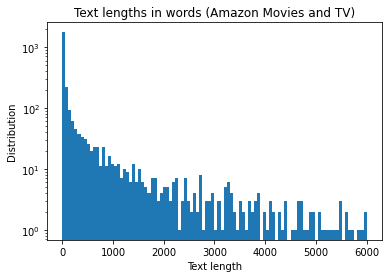

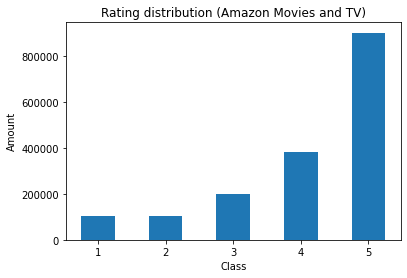

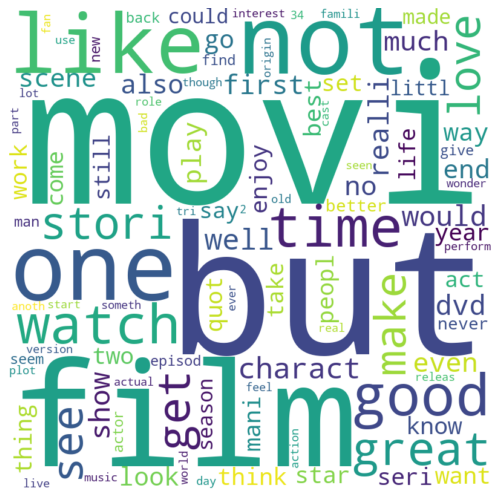

In [1]:
import pandas as pd
from Scripts import profiling as pf, cleaning as cl
from Scripts import preprocessing as prep

df = pd.read_pickle('../Data/amazon_movie.pkl')
print('Data loaded')
print('######## Tail: ')
print(df.tail())

print('######## GENERAL INFORMATION')
pf.get_review_count(df)
pf.get_descr(df)


print('######## COMPLETION CHECK')
print('Missing Text')
pf.get_missing_text(df)
print('Missing Label')
pf.get_missing_label(df)
print('Before deleting empty review texts: ', len(df))
df = df[df['text'] != '']
print('After deleting empty review texts: ', len(df))


print('######## DUPLICATION CHECK')
df = pf.remove_duplicates(df)
df = cl.remove_dup_text(df)


print('######## WORD COUNT')
pf.create_word_count(df)
pf.get_shortest_review(df)
pf.get_longest_review(df)

print('# Less than 10 words: ')
print(df[df.word_count<10]['label'].value_counts())
print('More than 1000 words: ')
print(df[df.word_count>1000]['label'].value_counts())

pf.show_word_length_dist(df, 'amazon_movie_pkl_textlength_raw_logarithmic', 'Amazon Movies and TV', True)


print('######## RATING DISTRIBUTION')
pf.show_rating_dist(df, 'amazon_movie_pkl_rating_dist', 'Amazon Movies and TV')

# OTHER WORD PROFILINGS
df['text'] = [prep.to_lowercase(line) for line in df['text']]
print('Text lowercased')
df['text'] = df['text'].str.replace('[^a-zA-Z0-9]',' ')
print('Removed everything except alphanumericals')
df['text'][100]

# NUMERICS
pf.get_num_perc(df)

# STOPWORDS
pf.get_stop_perc(df)
df.text = [prep.remove_stopwords(line) for line in df.text]

# MOST FREQUENT WORDS
pf.get_unique_wordstem_count(df)
mostcommon = pf.get_mostcommon(df)

from collections import Counter
corpus = pd.Series(' '.join(df['text']).split())
corpus_counts = Counter(corpus)
mostcommon = pd.DataFrame(corpus_counts.most_common(100), columns=['Word', 'Frequency'])
print(mostcommon[0:50])

In [ ]:

pf.show_word_length_per_label(df)


,text,label,word_count,numerics_mix,stopwords
0,charm version classic dicken tale henri winkle...,4.0,57,0,28
1,good but not emot move christma carol dicken l...,3.0,24,0,10
2,get wrong winkler wonder charact actor would r...,3.0,49,3,25
3,henri winkler good twist classic stori not con...,5.0,30,0,13
4,one best scroog movi henri winkler outdo cast ...,4.0,28,0,12
